In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
data_path = './datasets/plant-pathology-2020-fgvc7/'

train_set = pd.read_csv(data_path + 'train.csv', index_col = 0)
test_set = pd.read_csv(data_path + 'test.csv', index_col = 0)

In [3]:
train_set.shape

(1821, 4)

In [4]:
test_set.shape

(1821, 0)

In [5]:
train_set.head()

healthy  multiple_diseases  rust  scab
image_id                                        
Train_0         0                  0     0     1
Train_1         0                  1     0     0
Train_2         1                  0     0     0
Train_3         0                  0     1     0
Train_4         1                  0     0     0

In [6]:
train_healthy = train_set.loc[train_set['healthy']==1]
train_multiple_diseases = train_set.loc[train_set['multiple_diseases']==1]
train_rust = train_set.loc[train_set['rust']==1]
train_scab = train_set.loc[train_set['scab']==1]

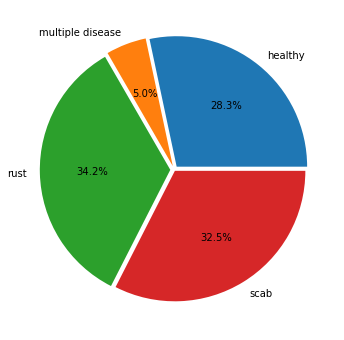

In [7]:
# data visualization
plt.figure(figsize=(6, 6))
label = ['healthy', 'multiple disease', 'rust', 'scab']
explode = [0.03, 0.03, 0.03, 0.01]
plt.pie([len(train_healthy), len(train_multiple_diseases), len(train_rust), len(train_scab)],
       labels=label,
       autopct='%.1f%%',
       explode=explode)
plt.show()

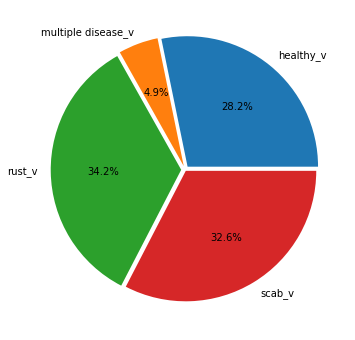

In [8]:
from sklearn.model_selection import train_test_split
train_set, valid_set = train_test_split(train_set, 
                            test_size=0.2,
                            stratify=train_set[['healthy', 'multiple_diseases', 'rust', 'scab']],
                            random_state=42)

healthy_v = valid_set.loc[valid_set['healthy']==1]
multiple_diseases_v = valid_set.loc[valid_set['multiple_diseases']==1]
rust_v = valid_set.loc[valid_set['rust']==1]
scab_v = valid_set.loc[valid_set['scab']==1]

plt.figure(figsize=(6, 6))
label = ['healthy_v', 'multiple disease_v', 'rust_v', 'scab_v']
explode = [0.03, 0.03, 0.03, 0.01]
plt.pie([len(healthy_v), len(multiple_diseases_v), len(rust_v), len(scab_v)],
       labels=label,
       autopct='%.1f%%',
       explode=explode)
plt.show()

In [9]:
from matplotlib import gridspec
from PIL import Image

def show_image(img_ids, rows=4, cols=3): 
    assert len(img_ids) <= rows*cols

    plt.figure(figsize=(15, 15)) 
    grid = gridspec.GridSpec(rows, cols) 

    for idx, img_id in enumerate(img_ids):
        img_path = f'{data_path}/images/{img_id}.jpg' 
        image = Image.open(img_path)
        ax = plt.subplot(grid[idx])
        ax.imshow(image)

In [10]:
healthy_img_ids = train_healthy.index[-12:]
multiple_diseases_img_ids = train_multiple_diseases.index[-12:]
rust_img_ids = train_rust.index[-12:]
scab_img_ids = train_scab.index[-12:]

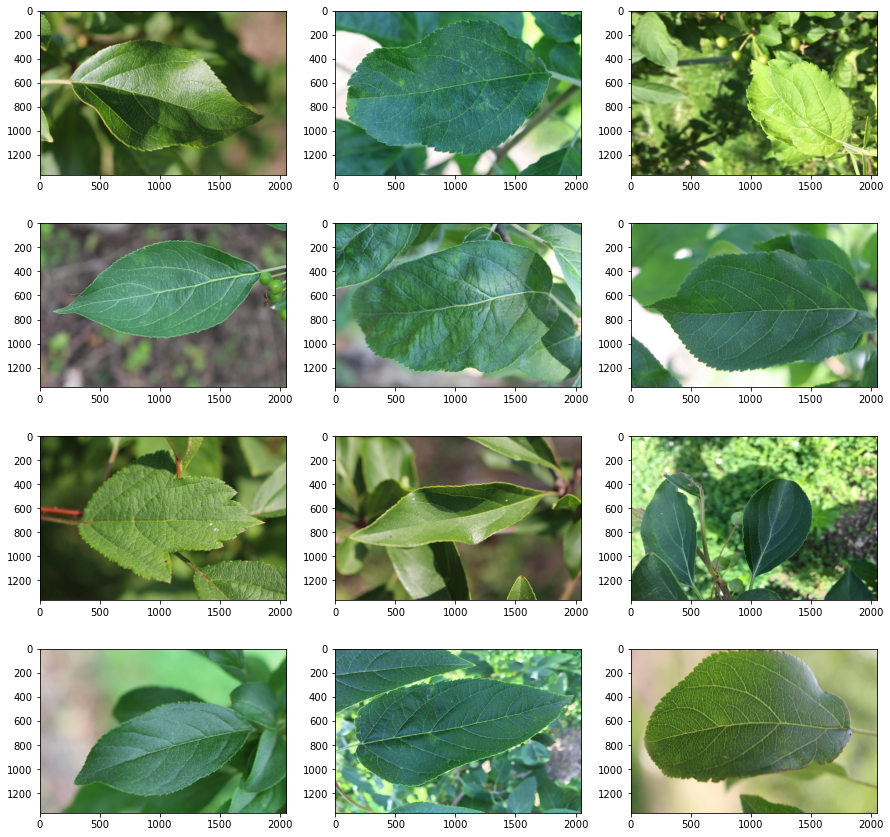

In [11]:
show_image(healthy_img_ids) # show healthy leaf

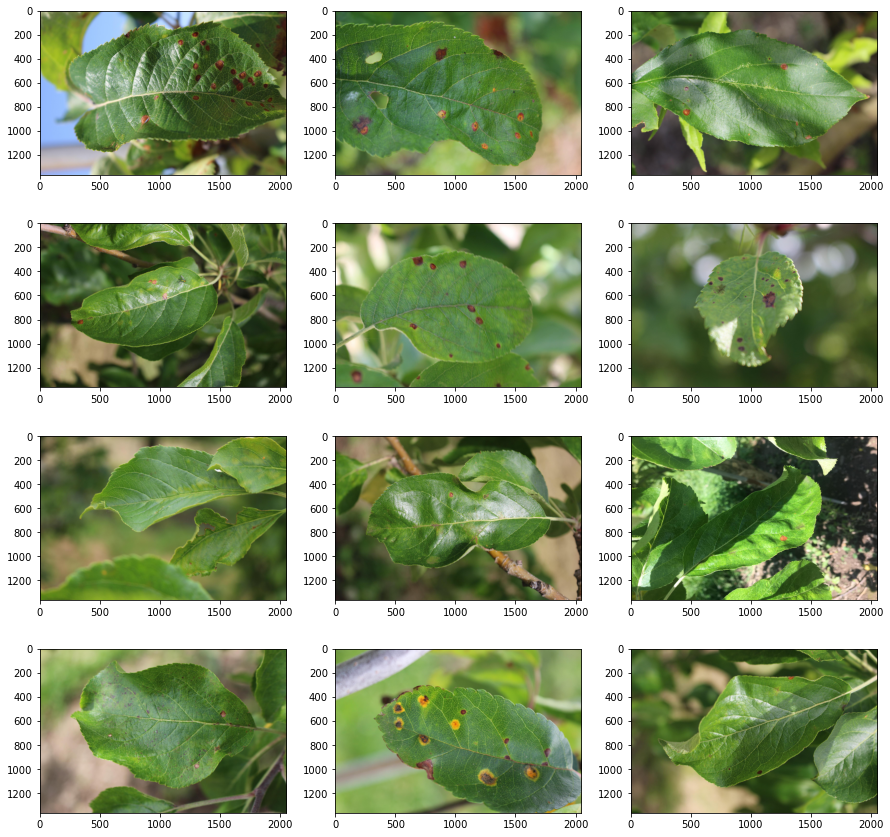

In [12]:
show_image(multiple_diseases_img_ids) # show leaf with multiple diseases

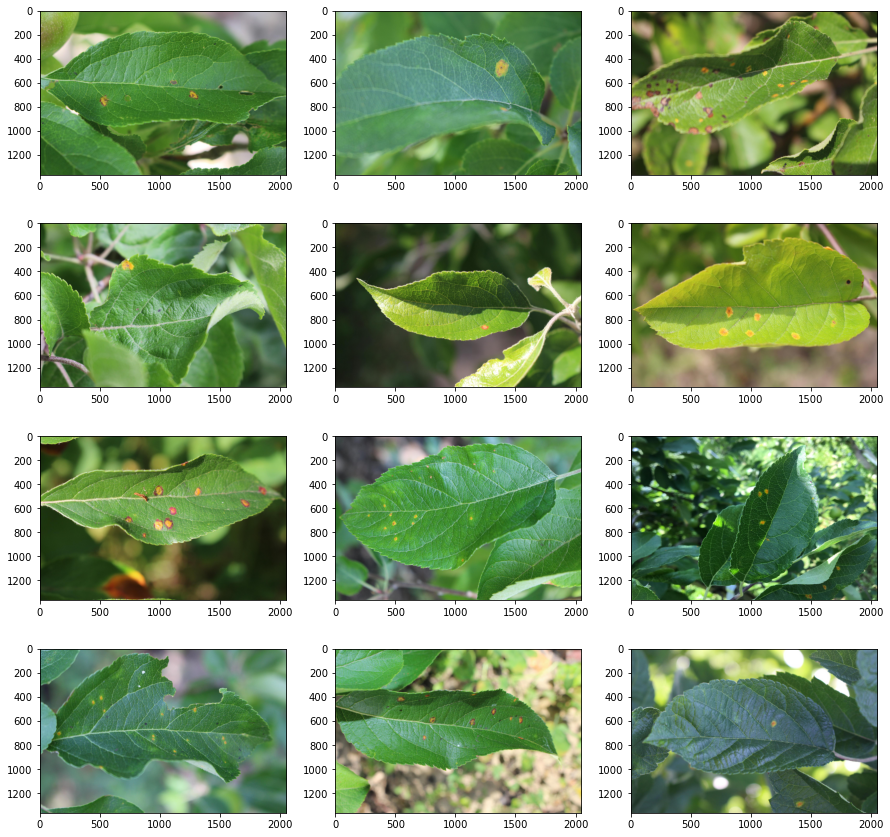

In [13]:
show_image(rust_img_ids) # show leaf with rust

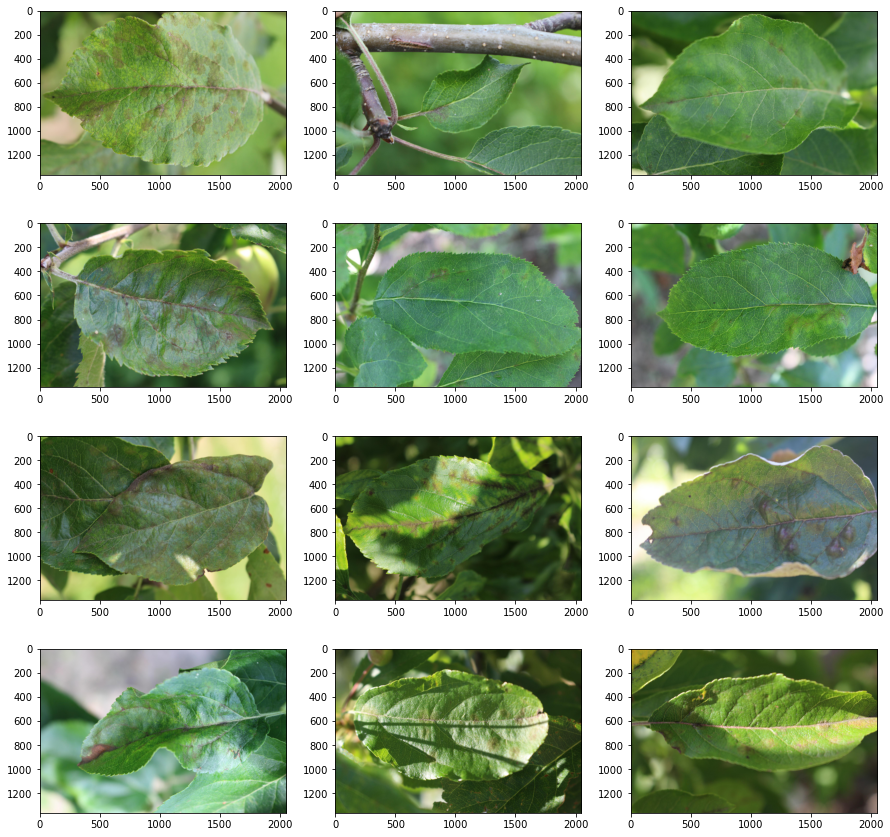

In [14]:
show_image(scab_img_ids) # show leaf with scab

In [17]:
import shutil
import os
from shutil import copyfile


if os.path.exists(data_path+'temp/'):
    shutil.rmtree(data_path+'temp/')

os.mkdir(data_path+'temp/')

# train directory
os.mkdir(data_path+'temp/train')
os.mkdir(data_path+'temp/train/healthy')
os.mkdir(data_path+'temp/train/multiple_diseases')
os.mkdir(data_path+'temp/train/rust')
os.mkdir(data_path+'temp/train/scab')

# validation directory
os.mkdir(data_path+'temp/valid')
os.mkdir(data_path+'temp/valid/healthy')
os.mkdir(data_path+'temp/valid/multiple_diseases')
os.mkdir(data_path+'temp/valid/rust')
os.mkdir(data_path+'temp/valid/scab')

In [18]:
import numpy as np
SOURCE = data_path+'images/'

TRAIN_DIR = data_path+'temp/train/'

for index, data in train_set.iterrows():
    label = train_set.columns[np.argmax(data)]
    filepath = os.path.join(SOURCE, index + ".jpg")
    destination = os.path.join(TRAIN_DIR, label, index + ".jpg")
    copyfile(filepath, destination)
    
for subdir in os.listdir(TRAIN_DIR):
    print(subdir, len(os.listdir(os.path.join(TRAIN_DIR, subdir))))

healthy 413
multiple_diseases 73
rust 497
scab 473


In [19]:
VALID_DIR = data_path+'temp/valid/'

for index, data in valid_set.iterrows():
    label = train_set.columns[np.argmax(data)]
    filepath = os.path.join(SOURCE, index + ".jpg")
    destination = os.path.join(VALID_DIR, label, index + ".jpg")
    copyfile(filepath, destination)
    
for subdir in os.listdir(VALID_DIR):
    print(subdir, len(os.listdir(os.path.join(VALID_DIR, subdir))))

healthy 103
multiple_diseases 18
rust 125
scab 119


In [20]:
import random
import numpy as np
import os
import cv2
import glob
from PIL import Image
import PIL.ImageOps    

num_augmented_images = 350

file_path = data_path+'temp/train/multiple_diseases/'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)
augment_cnt = 1

for i in range(1, num_augmented_images):
    change_picture_index = random.randrange(1, total_origin_image_num-1)
    file_name = file_names[change_picture_index]
    
    origin_image_path =  data_path+'temp/train/multiple_diseases/' + file_name
    image = Image.open(origin_image_path)
    random_augment = random.randrange(1,3)
    
    if(random_augment == 1):
        augment1_image = image.transpose(Image.FLIP_LEFT_RIGHT)
        augment1_image = augment1_image.rotate(random.randrange(-20, 20))
        augment1_image.save(file_path+ str(augment_cnt) + '.jpg')
        
    elif(random_augment == 2):
        augment2_image = image.transpose(Image.FLIP_TOP_BOTTOM)
        augment2_image = augment2_image.rotate(random.randrange(-20, 20))
        augment2_image.save(file_path + str(augment_cnt) + '.jpg')
        
    augment_cnt += 1

In [21]:
for subdir in os.listdir(TRAIN_DIR):
    print(subdir, len(os.listdir(os.path.join(TRAIN_DIR, subdir))))

healthy 413
multiple_diseases 422
rust 497
scab 473


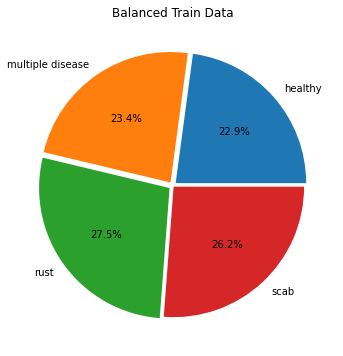

In [22]:
healthy_b = len(os.listdir(os.path.join(TRAIN_DIR, 'healthy')))
multiple_diseases_b = len(os.listdir(os.path.join(TRAIN_DIR, 'multiple_diseases')))
rust_b = len(os.listdir(os.path.join(TRAIN_DIR, 'rust')))
scab_b = len(os.listdir(os.path.join(TRAIN_DIR, 'scab')))

plt.figure(figsize=(6, 6))
label = ['healthy', 'multiple disease', 'rust', 'scab']
explode = [0.03, 0.03, 0.03, 0.01]
plt.pie([healthy_b, multiple_diseases_b, rust_b, scab_b],
       labels=label,
       autopct='%.1f%%',
       explode=explode)
plt.title("Balanced Train Data")
plt.show()

In [23]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range=30,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAIN_DIR, target_size=(224,224), class_mode='categorical', batch_size=32)
validation_generator = validation_datagen.flow_from_directory(VALID_DIR, target_size=(224,224), class_mode='categorical', batch_size=32)

Found 1805 images belonging to 4 classes.
Found 365 images belonging to 4 classes.


Using TensorFlow backend.


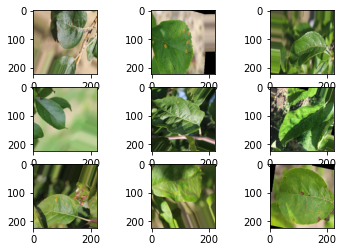

In [28]:
# augmentation 후 이미지 확인
for i in range(9):
    batch = train_generator.next()
    plt.subplot(3, 3, i+1)
    plt.imshow(batch[0][i])